In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('http://taanila.fi/beer.csv')
df.index=pd.to_datetime(df['Month'],format='%Y-%m')
df=df.drop('Month',axis=1)
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


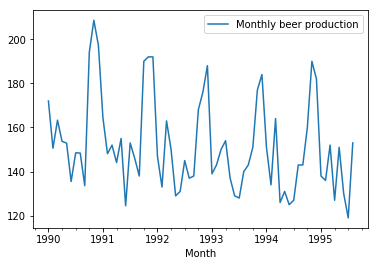

In [3]:
df['1990-01':'1995-12'].plot()

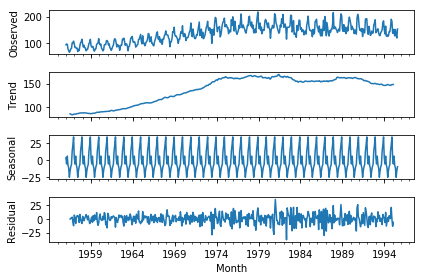

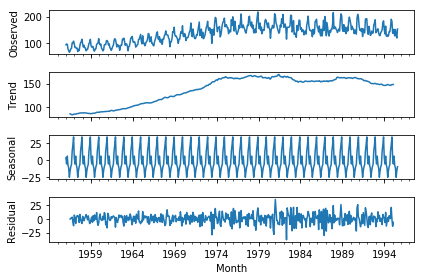

In [4]:
from statsmodels.tsa.api import seasonal_decompose
seasonal_decompose(df['Monthly beer production']).plot()

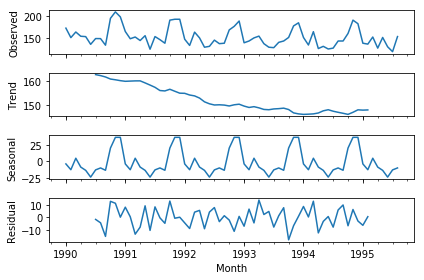

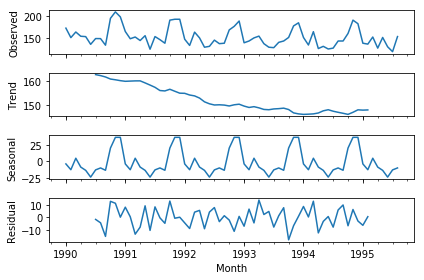

In [5]:
seasonal_decompose(df['Monthly beer production']['1990-01':'1995-12']).plot()

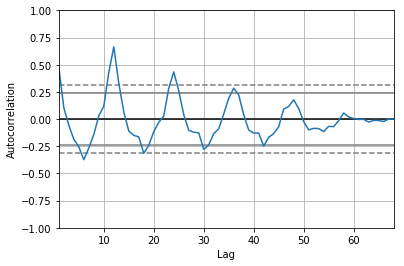

In [6]:
#Tarkastellaan kausivaihtelua
from pandas.plotting import autocorrelation_plot 
autocorrelation_plot(df['Monthly beer production']['1990-01':'1995-12'])

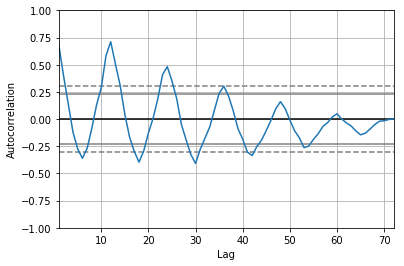

In [7]:
autocorrelation_plot(df['Monthly beer production']['1960-01':'1965-12'])

In [8]:
from statsmodels.tsa.api import ExponentialSmoothing as ExpS
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [15]:
fit1=ExpS(df['Monthly beer production'],seasonal_periods=12, freq='MS',
          trend='add',seasonal='mul').fit()

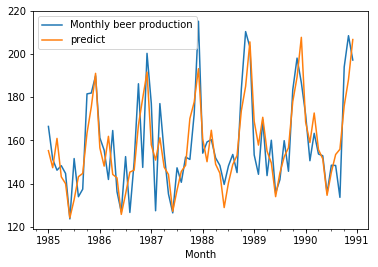

In [16]:
df['predict']=fit1.fittedvalues
df['1985-01':'1990-12'].plot()

__Mallin hyvyys__

In [17]:
sqrt(mean_squared_error(df['Monthly beer production'], df['predict']))

9.772425195978073

In [18]:
mean_absolute_error(df['Monthly beer production'], df['predict'])

7.413264474352966

__Lasketaan ennusteet seuraavalle vuodelle__

In [23]:
df.tail()

,Monthly beer production,predict
Month,,
1995-04-01,127.0,137.097606
1995-05-01,151.0,132.248655
1995-06-01,130.0,119.249562
1995-07-01,119.0,129.654186
1995-08-01,153.0,135.081334


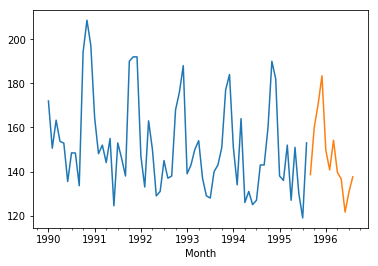

In [24]:
indeksi=pd.date_range('1995-09-01',periods=12, freq='MS')
dfp=pd.DataFrame(fit1.forecast(12),index=indeksi)
dfp.columns=['prediction']
df['Monthly beer production']['1990-01':].plot()
dfp['prediction'].plot()